# Rachel Ward - DAV 5400 
## Project 4 - Predictive Analysis using scikit-learn

For this project I will be using the [UCI Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom) and scikit-learn to answer the following question:

**“Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of
whether a particular mushroom is poisonous or edible?”**

This project will be separated into two phases. The first phase will consist of data acquisition, data preparation & exploratory data analysis. The second phase will consist of building predictive models to determine which attribute is the best predictor of whether a particular mushroom is poisonous or edible.

## Phase 1 - Data Acquisition, Data Preparation & Exploratory Data Analysis

For this first phase of this project, I will be acquiring the data, preparing it to build a predictive model, and performing exploratory data analysis. 

First I studied the dataset and the associated description of the data from the UCI website.
Then I will save the dataset to my github account, and read the file into a pandas dataframe. I will create a subset of this large dataframe that only includes variables I am interested in studied. I will also rename these columns to facilitate the analysis. 

I will perform exploratory data analysis on each column of this subset and show plots of the poisonous/edible variable vs. each of the other columns. To create these plots I will need to do transform the poisonous/edible column into an indicator column with 1 indicating poisonous and 0 indicating edible. 

After I perform my exploratory data analysis, I will create sets of dummy variables for each of the other variables since scikit-learn requires that values be stored as numeric values. 

I will provide preliminary conclusions throughout my exploratory analysis. I begin this phase immediately below with acquiring the data. 

### Phase 1: Data Acquisition

I first downloaded the data from the UCI website and saved it to my github account. Now, to begin, I will first import pandas and numpy and then read in the file using pandas read_csv function.

In [40]:
#first import pandas
import pandas as pd

#also import numpy
import numpy as np

#now read in the file
filename = "https://raw.githubusercontent.com/rachelward617/DAV-5400/master/agaricus-lepiota.data"
mushrooms = pd.read_csv(filename, header = None)

#check results
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now that I have loaded the data into a dataframe I will create a smaller dataframe with a subset of these columns.

I will include column 0 which indicates edible or poisonous, column 5 which indicates odor, column 3 which indicates cap color, column 8 which indicates gill-size, and column 22 which indicates habitat. While columns 0 and 5 were a requirement of the assignment, I chose column 3 after doing some research on [a website about wild food](https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/) which says that mushrooms with red caps tend to be poisonous. Columns 8 and 22 were chosen because in the small data set in the cell directly above, both poisonous mushrooms have an "n" in column 8 while the edible mushrooms all have a "b." Similarly in column 22, both poisonous mushrooms have a value of u while the edible mushrooms have different variables. 

I will also assign meaningful column names to this new data frame so that it is easier to analyze. 

In [41]:
#create a smaller data frame with only columns 0,3,5,8, and 22.
shrooms = mushrooms[[0,3,5,8,22]].copy()

#rename the columns to meaningful names
shrooms.rename(columns={0: "Poisonous/Edible", 3: "Cap_Color", 5: "Odor", 8: "Gill_Size", 22: "Habitat"}, inplace= True)

#show results
shrooms.head()

,Poisonous/Edible,Cap_Color,Odor,Gill_Size,Habitat
0,p,n,p,n,u
1,e,y,a,b,g
2,e,w,l,b,m
3,p,w,p,n,u
4,e,g,n,b,g


### Phase 1 - Exploratory Data Analysis

Now I will perform exploratory data analysis on the columns I selected in the shrooms data frame. I will show the distribution of data for each of the columns. I will also show plots for poisonous/edible vs. odor as well as the other columns that I selected.

First I will check the new dataset for null values and see how many records there are.

In [42]:
# check the dataset for null values
shrooms.isnull().sum()

Poisonous/Edible    0
Cap_Color           0
Odor                0
Gill_Size           0
Habitat             0
dtype: int64

In [43]:
#check how many records are in the data set
shrooms.shape

(8124, 5)

### Exploratory Data Analysis - Poisonous/Edible

I will begin by analyzing the poisonous/edible column. Since this is a categorical variable I will then graph the distribution using a countplot from seaborn.

In [44]:
#now that we know there are no null values I will begin by analyzing the attribute poisonous/edible
#provide summary statistics for the attribute poisonous/edible
shrooms['Poisonous/Edible'].describe()

count     8124
unique       2
top          e
freq      4208
Name: Poisonous/Edible, dtype: object

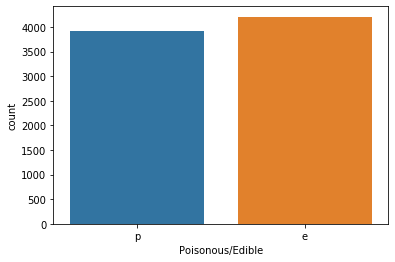

In [45]:
#first import seaborn as a visualization tool
import seaborn as sns

#next I will use Seaborn's built-in countplot feature to show the distribution of poisonous or edible
edibleplot = sns.countplot(x="Poisonous/Edible", data=shrooms)

#show the bar/count plot
edibleplot;

### Exploratory Data Analysis - Poisonous/Edible: Results

Based on the above count plot and summary statistics, there are only two different values present in this column, 'e' and 'p' which stand for edible and poisonous. From looking at the countplot and the statistics we also know that e is the most common, occuring 4208 out of the total 8124 records. This means more than half of the records in this dataset are for edible mushrooms. The distribution is fairly unimodal. 

### Exploratory Data Analysis - Cap Color

Next I will analyze the cap_color column. Since this is also a categorical variable I will then graph the distribution using a countplot from seaborn.

In [46]:
#provide summary statistics for the attribute cap_color
shrooms['Cap_Color'].describe()

count     8124
unique      10
top          n
freq      2284
Name: Cap_Color, dtype: object

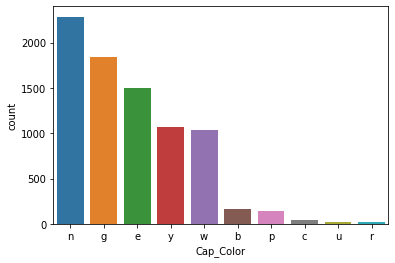

In [47]:
#next I will use Seaborn's built-in countplot feature to show the distribution of cap color
#use the order function to have it sort in descending order
capcolorplot = sns.countplot(x="Cap_Color", data=shrooms, order = shrooms['Cap_Color'].value_counts().index)

#show the bar/count plot
capcolorplot;

### Exploratory Data Analysis - Cap_Color: Results

Based on the above count plot and summary statistics, there are ten different values present in this column. From looking at the countplot and the statistics we also know that brown ('n') is the most common, occuring in 2284 out of the total 8124 records. The distribution is skewed right because I sorted in descending order. Had I sorted in ascending order it would have been skewed left. This means that there are a few values which do not occur very frequently.

In addition to brown ('n'), the other cap colors with 1000 or more occurrences are gray ('g'), red ('e'), yellow ('r'), and white ('w'). The colors buff ('b'), pink ('p'), cinnamon ('c'), purple ('u'), and green ('r') do not occur very frequently in this dataset. 

### Exploratory Data Analysis - Odor

Next I will analyze the odor column. Since this is also a categorical variable I will then graph the distribution using a countplot from seaborn.

In [48]:
#provide summary statistics for the attribute odor
shrooms['Odor'].describe()

count     8124
unique       9
top          n
freq      3528
Name: Odor, dtype: object

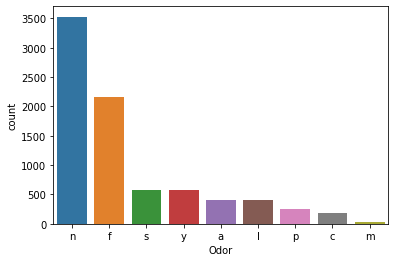

In [49]:
#next I will use Seaborn's built-in countplot feature to show the distribution of odor
#use the order function to have it sort in descending order
odorplot = sns.countplot(x="Odor", data=shrooms, order = shrooms['Odor'].value_counts().index)

#show the bar/count plot
odorplot;

### Exploratory Data Analysis - Odor: Results

Based on the above count plot and summary statistics, there are nine different values present in this column. From looking at the countplot and the statistics we also know that "none" ('n') is the most common odor, occuring in 3528 out of the total 8124 records. The distribution is skewed right because I sorted in descending order. Had I sorted in ascending order it would have been skewed left. Other than "none" the only other odor that occurs more than 1000 times is foul ('f'). The odors fishy ('y') and spicy ('s') each occur around 500 times, with odors of anise ('l') and almond ('a') occurring slightly less than 500 times each. The odors pungent ('p'), creosote ('c') and musty ('m') do not occur very frequently. 

### Exploratory Data Analysis - Gill Size
Next I will analyze the gill size column. Since this is also a categorical variable I will then graph the distribution using a countplot from seaborn.

In [50]:
#provide summary statistics for the attribute gill size
shrooms['Gill_Size'].describe()

count     8124
unique       2
top          b
freq      5612
Name: Gill_Size, dtype: object

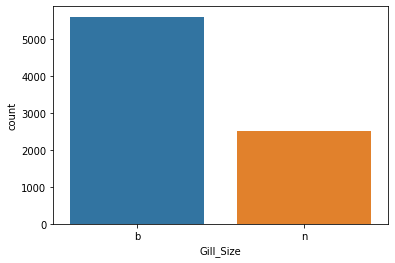

In [51]:
#next I will use Seaborn's built-in countplot feature to show the distribution of gill size
#use the order function to have it sort in descending order
gillplot = sns.countplot(x="Gill_Size", data=shrooms, order = shrooms['Gill_Size'].value_counts().index)

#show the bar/count plot
gillplot;

### Exploratory Data Analysis - Gill Size: Results
Based on the above count plot and summary statistics, there are only two different values present in this column. From looking at the countplot and the statistics we also know that broad ('b') is the most common gill size, occuring in 5612 out of the total 8124 records. We can also see that a broad gill size occurs almost twice as frequently as narrow ('n'). 

### Exploratory Data Analysis - Habitat

Next I will analyze the habitat column. Since this is also a categorical variable I will then graph the distribution using a countplot from seaborn.

In [52]:
#provide summary statistics for the attribute habitat
shrooms['Habitat'].describe()

count     8124
unique       7
top          d
freq      3148
Name: Habitat, dtype: object

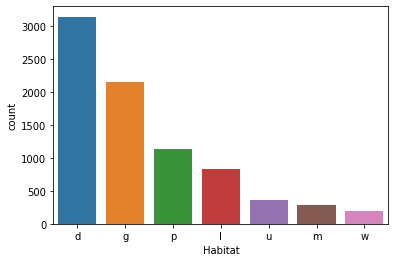

In [53]:
#next I will use Seaborn's built-in countplot feature to show the distribution of habitat
#use the order function to have it sort in descending order
habitatplot = sns.countplot(x="Habitat", data=shrooms, order = shrooms['Habitat'].value_counts().index)

#show the bar/count plot
habitatplot;

### Exploratory Data Analysis - Habitat: Results

Based on the above count plot and summary statistics, there are seven different values present in this column. From looking at the countplot and the statistics we also know that woods ('d') is the most common habitat, occuring in 3148 out of the total 8124 records. The distribution is skewed right because I sorted in descending order. Had I sorted in ascending order it would have been skewed left. Aside from the woods, other habitats that occur more than 1000 times within the dataset are grasses ('g') and paths ('p'). Leaves ('l') occurs almost 1000 times, and urban ('u'), meadows ('m') and waste ('w') occur less than 500 times each within the dataset. 

### Exploratory Data Analysis - Poisonous/Edible vs. Other Variables

First, since we know from earlier that there are no null values, and that there are only two possible values for the poisonous column ('p' and 'e'), I will create an indicator variable for the poisonous/edible column. I will use 1 in place of p and 0 in place of e. Then I will create catplots using seaborn to show poisonous or edible versus each of the other columns.

In [54]:
#use list comprehensions to change the values in the poisonous/edible column to 1 if poisonous or 0 if edible
shrooms['Poisonous/Edible'] = [1 if x == 'p' else 0 for x in shrooms['Poisonous/Edible']]

#check results
shrooms.head()

,Poisonous/Edible,Cap_Color,Odor,Gill_Size,Habitat
0,1,n,p,n,u
1,0,y,a,b,g
2,0,w,l,b,m
3,1,w,p,n,u
4,0,g,n,b,g


### Exploratory Data Analysis - Poisonous/Edible vs. Cap Color

Now that the poisonous/edible is in indicator form, I will use catplot from Seaborn to show the relationship between poisonous/edible and cap color.

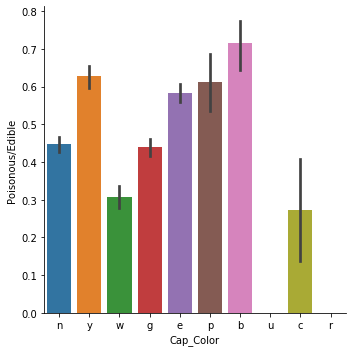

In [45]:
# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

#use the catplot function to graph cap color vs. poisonous/edible
sns.catplot(x="Cap_Color", y="Poisonous/Edible", kind="bar", data=shrooms);

### Exploratory Data Analysis - Poisonous/Edible vs. Cap Color - Results

Since 1 indicates poisonous, it appears that cap colors of buff ('b'), yellow ('y'), pink ('p'), and red ('e') tend to be poisonous as they all are greater than .5.

Cap colors of brown, gray, white and cinnamon are less than .5 and greater than 0 which indicates that mushrooms with these cap colors are sometimes poisonous and sometimes edible. 

Two of the cap colors, purple and green, have 0. Since we know these cap colors appear in the dataset, this indicates that mushrooms in this dataset with these cap colors are edible. 

### Exploratory Data Analysis - Poisonous/Edible vs. Odor

Next I will look at the relationship between the poisonous/edible indicator and the odor variable. I will use catplot from Seaborn to show the relationship between poisonous/edible and odor.

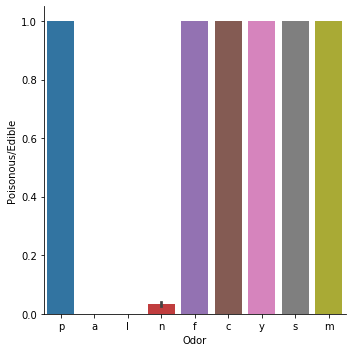

In [11]:
#use the catplot function to graph odor vs. poisonous/edible
sns.catplot(x="Odor", y="Poisonous/Edible", kind="bar", data=shrooms);

### Exploratory Data Analysis - Poisonous/Edible vs. Odor - Results 

The catplot above shows that odor may be a very useful variable in helping to predict whether or not a certain mushroom is poisonous. Several of the odors are 1, which means that all the mushrooms in this dataset with those odors are poisonous. Based on the catplot, any mushroom with a pungent, foul, creosote, fishy, spicy, or musty odor is poisonous. 

Additionally, based on the catplot, it appears that mushrooms that have an odor of almond or anise are edible. Mushrooms with no odor appear to generally edible although there are a few mushrooms with no odor which are poisonous. 

### Exploratory Data Analysis - Poisonous/Edible vs. Gill Size

Next I will look at the relationship between the poisonous/edible indicator and the gill size variable. I will use catplot from Seaborn to show the relationship between poisonous/edible and gill size.

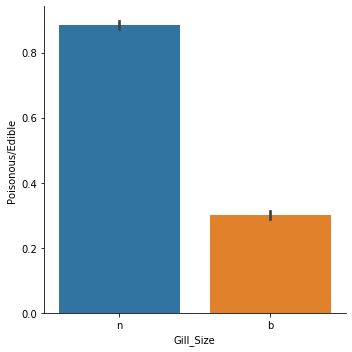

In [12]:
#use the catplot function to graph gill size vs. poisonous/edible
sns.catplot(x="Gill_Size", y="Poisonous/Edible", kind="bar", data=shrooms);

### Exploratory Data Analysis - Poisonous/Edible vs. Gill Size - Results 

The catplot above shows that mushrooms with a narrow gill size tend to be poisonous, as they trend towards 1 (which is poisonous). Mushrooms with a broad gill size can be either poisonous or edible, but more often appear to be edible. 


### Exploratory Data Analysis - Poisonous/Edible vs. Habitat

Next I will look at the relationship between the poisonous/edible indicator and the habitat variable. I will use catplot from Seaborn to show the relationship between poisonous/edible and habitat.

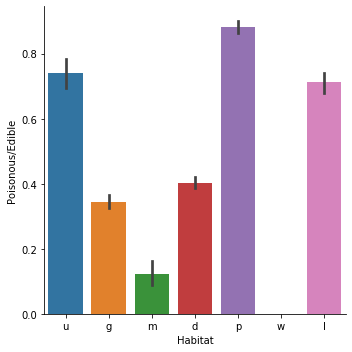

In [13]:
#use the catplot function to graph habitat vs. poisonous/edible
sns.catplot(x="Habitat", y="Poisonous/Edible", kind="bar", data=shrooms);

### Exploratory Data Analysis - Poisonous/Edible vs. Habitat - Results

From the catplot above, it would appear that mushrooms found on paths, in urban habitats, and in leaves tend to be poisonous. Mushrooms found in the woods, in grasses, and in meadows are more often edible than poisonous. 

Additionally it would appear that the mushrooms in this dataset that were found in "waste" habitats are edible. From our earlier Exploratory Data Analysis on the habitat variable, we know there are fewer than 500 mushrooms found in waste environments in this dataset, so in a dataset with more mushrooms that live in waste habitats, there may be some which are poisonous. 

### Phase 1 - Data Preparation

I already converted the poisonous/edible variable to an indicator variable. In order to build a predictive model, I must now convert all of the other categorical variables to dummy variables. 

From reading an article about dummy variables [here](https://stattrek.com/multiple-regression/dummy-variables.aspx), I know that for variables that have *k* number of values, I need to create only *k-1* dummy variables, otherwise I will have a multicollinearity effect which will impact the predictive model. 

Therefore, for the variables of cap color, odor, gill size and habitat I will create dummy variables using pandas get_dummies() function, using [this resource](https://www.ritchieng.com/pandas-creating-dummy-variables/) as a guide.

In [63]:
#create a copy of our data frame
withdummies = shrooms.copy()

# create dummy variables for multiple categories, drop_first=True handles k - 1 
withdummies = pd.get_dummies(withdummies, columns=['Cap_Color', 'Odor', 'Gill_Size', 'Habitat'], drop_first=True)

#checkresults
withdummies

,Poisonous/Edible,Cap_Color_c,Cap_Color_e,Cap_Color_g,Cap_Color_n,Cap_Color_p,Cap_Color_r,Cap_Color_u,Cap_Color_w,Cap_Color_y,...,Odor_p,Odor_s,Odor_y,Gill_Size_n,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0


## Phase 1 - Wrap-Up

As stated earlier, I acquired the data, created a subset of the data, performed exploratory data analysis, and then prepared the data to build a predictive model using sci-kit learn.

Based on my exploratory data analysis, it appears that the columns based on odor will be strong predictors of whether or not a mushroom is poisonous. Certain cap colors will also be very useful in predicting whether or not a mushroom is poisonous. A gill size of narrow should be a helpful predictor that a mushroom is poisonous, and certain habitats should also prove helpful in this determination.

Now I will move on to Phase 2, which is building the predictive model. 

## Phase 2 - Build Predictive Models

In Phase 2 I will be using the dataframe that was prepared in order to determine which of the predictor columns that I selected (odor, cap color, gill size, and habitat) most accurately predicts whether or not a mushroom is poisonous. 

Based on [this article from Towards Data Science](https://towardsdatascience.com/a-comprehensive-study-of-linear-vs-logistic-regression-to-refresh-the-basics-7e526c1d3ebe) I will be using logistic regression because the outcomes are only 1 or 0, and because some of the variables have multiple categories. 

First I will split the data into test and train sets. I will first train the model, describe my findings, and then test the model and offer conclusions and ideas for further analysis. 

In [65]:
# first I will define the predictor variables
predict = ['Cap_Color_c','Cap_Color_e','Cap_Color_g','Cap_Color_n','Cap_Color_p','Cap_Color_r','Cap_Color_u','Cap_Color_w','Cap_Color_y','Odor_l', 'Odor_c', 'Odor_y', 'Odor_f', 'Odor_m', 'Odor_n', 'Odor_p', 'Odor_s','Gill_Size_n','Habitat_g', 'Habitat_l', 'Habitat_m', 'Habitat_p', 'Habitat_u', 'Habitat_w']

# now I will create a subset of the data using ONLY the selected predictive variables
x = withdummies[predict].values

# create a subset that is only the poisonous/edible variable since that's the response variable
y = withdummies['Poisonous/Edible'].values

#Check data
x[:5]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0]], dtype=uint8)

In [66]:
#check to make sure there are 24 columns - the withdummies dataframe had 25 but one was the poisonous/edible column
x.shape

(8124, 24)

In [67]:
#also double check the response array
y[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [77]:
# load train_test_split, Linear Regression and metrics from scikit learn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#create training and testing variables, use 80% of the data to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Now that I have created a training and testing set, it is time to train the model using logistic regression

In [78]:
#define the model type as logistic regression
model = LogisticRegression()

#train the algorithm
model.fit(x_train, y_train)

C:\Users\sheri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#get the coefficients:
print(model.coef_)

[[-2.51038624 -1.6458752  -2.5129514  -2.10320918  1.7140165  -2.58328505
  -2.5159296  -1.89602952 -1.91611835 -2.84719387  3.93866627  4.7653538
   9.15893802  5.7975764  -0.32461448  4.82577481  4.73522724  3.74602314
   0.86512593  0.15947416  2.3520565   0.45244621 -1.12226681 -2.20534002]]


In [80]:
# calculate the accuracy of the model relative to the training data set
model.score(x_train, y_train)

0.9873826742575781

## Phase 2 - Model Training Results
Note that we know from our Exploratory Data Analysis that there were 3,916 poisonous mushrooms (48.2%) in the data set.We could achieve an accuracy of 1-.482 = 51.8% by predicting "edible" for each mushroom. So our **null erorr rate** is 51.8%. Our model score is 98.7%, which is substantially higher. 

Additionally, since 1 indicates poisonous and 0 indicates edible, by matching the data frame columns and using the indices provided at the UCI websites, from the coefficients above we see the following:

**Cap Color** 
- A cap color of cinnamon has a negative coefficient indicating it is more likely to be edible. 
- A cap color of red has a negative coefficient indicating it is more likely to be edible. 
- A cap color of gray has a negative coefficient indicating it is more likely to be edible.
- A cap color of brown has a negative coefficient indicating it is more likely to be edible.
- A cap color of pink has a positive coefficient indiicating it is more likely to be poisonous. 
- A cap color of green has a negative coefficient indicating it is more likely to be edible.
- A cap color of purple has a negative coefficient indicating it is more likely to be edible.
- A cap color of white has a negative coefficient indicating it is more likely to be edible.
- A cap color of yellow has a negative coefficient indicating it is more likely to be edible.

In our EDA  we stated the following:
"Since 1 indicates poisonous, it appears that cap colors of buff ('b'), yellow ('y'), pink ('p'), and red ('e') tend to be poisonous as they all are greater than .5.

Cap colors of brown, gray, white and cinnamon are less than .5 and greater than 0 which indicates that mushrooms with these cap colors are sometimes poisonous and sometimes edible.

Two of the cap colors, purple and green, have 0. Since we know these cap colors appear in the dataset, this indicates that mushrooms in this dataset with these cap colors are edible."

Based on our coefficients, only a cap color of pink is likely to be poisonous, but this is not in line with what our Exploratory Data Analysis showed.

**Odor**
- An odor of creosote has a negative coefficient indicating it is more likely to be edible.
- An odor of foul has a positive coefficient indicating it is more likely to be poisonous.
- An odor of anise has a positive coefficient indicating it is more likely to be poisonous.
- An odor of musty has a positive coefficient indicating it is more likely to be poisonous.
- An odor of none has a positive coefficient indicating it is more likely to be poisonous.
- An odor of pungent has a negative coefficient indicating it is more likely to be edible.
- An odor of spicy has a positive coefficient indicating it is more likely to be poisonous.
- An odor of fishy has a positive coefficient indicating it is more likely to be poisonous.

In our EDA we stated the following:
"Several of the odors are 1, which means that all the mushrooms in this dataset with those odors are poisonous. Based on the catplot, any mushroom with a pungent, foul, creosote, fishy, spicy, or musty odor is poisonous.

Additionally, based on the catplot, it appears that mushrooms that have an odor of almond or anise are edible. Mushrooms with no odor appear to generally edible although there are a few mushrooms with no odor which are poisonous."

Our coefficients here do show that most of the odors indicate a poisonous mushroom. However the results for anise, creosote, and and pungent are inconsistent with our EDA findings.

**Gill Size**
- A narrow gill size has a positive coefficient indicating it is more likely to be poisonous.

In our EDA we said the following:
"The catplot above shows that mushrooms with a narrow gill size tend to be poisonous, as they trend towards 1 (which is poisonous). Mushrooms with a broad gill size can be either poisonous or edible, but more often appear to be edible."

For gill size, our EDA and model are consistent that a narrow gill size is a good indicator that a mushroom is poisonous.

**Habitat**
- A habitat of grasses has a positive coefficient indicating it is more likely to be poisonous.
- A habitat of leaves has a positive coefficient indicating it is more likely to be poisonous.
- A habitat of meadows has a positive coefficient indicating it is more likely to be poisonous.
- A habitat of paths has a positive coefficient indicating it is more likely to be poisonous.
- A habitat of urban has a negative coefficient indicating it is more likely to be edible.
- A habitat of waste has a negative coefficient indicating it is more likely to be edible.

In our EDA we stated the following:
"From the catplot above, it would appear that mushrooms found on paths, in urban habitats, and in leaves tend to be poisonous. Mushrooms found in the woods, in grasses, and in meadows are more often edible than poisonous.

Additionally it would appear that the mushrooms in this dataset that were found in "waste" habitats are edible. From our earlier Exploratory Data Analysis on the habitat variable, we know there are fewer than 500 mushrooms found in waste environments in this dataset, so in a dataset with more mushrooms that live in waste habitats, there may be some which are poisonous."

For habitat, our model and EDA are consistent that mushrooms found in paths and leaves habitats tend to be poisonous. Our model and EDA are also consistent in that mushrooms found in waste habitats tend to be edible. Our model and EDA are *inconsistent* with regards to mushrooms found in grasses, meadows, and urban habitats.

Now that we have trained the model, we will test it by using the model.predict function.

In [81]:
# generate predictions for the test data using our new model
y_predict = model.predict(x_test)
y_predict[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [84]:
#create a new data frame that shows the actual results versus the results of our prediction
testresults= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#display results
testresults

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,1,1
1623,0,0


Now we will check the performance of the model using accuracy, precision, and recall. Since accuracy is not always the best indicator, looking at these three metrics will give us a more robust picture of how our model performed.

In [86]:
print('Accuracy:', metrics.accuracy_score(y_test, y_predict))  
print('Precision:', metrics.precision_score(y_test, y_predict))
print('Recall:', metrics.recall_score(y_test, y_predict)) 

Accuracy: 0.9913846153846154
Precision: 1.0
Recall: 0.981888745148771


## Phase 2 - Results & Conclusions

Based on good accuracy, precision, and recall scores, it seems that the combination of attributes I chose (odor, gill size, cap color, and habitat) are a good way to predict whether or not a mushroom is poisonous.

To further determine the best predictive model, it would be better, if possible, to get a larger dataset. It would also be helpful to have the species name in this data set, since there are 23 species. It would be interesting to know if, for example, one species overall was found to be either completely poisonous or completely edible.

Since some of our coefficients did not perfectly align with what we saw in our Exploratory Data Analysis, it could also prove useful to try a different regression model to see if that yielded different results. 